In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [2]:
data = pd.read_csv(r"C:\Users\LENOVO\Desktop\Data_science_guvi\projects\Bank Risk Controller Systems\loan_data.csv")

In [3]:
data.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-606,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartmen

In [4]:
print("Info : ")
print(data.info())
print("__"*30)


print("shape : \n", "Rows : ", data.shape[0], "\n", "Columns :", data.shape[1])
print("__"*30)

print("Columns_name : ")
print(data.columns.tolist())

Info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(80), int64(46), object(32)
memory usage: 1.7+ GB
None
____________________________________________________________
shape : 
 Rows :  1413701 
 Columns : 158
____________________________________________________________
Columns_name : 
['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CIT

In [5]:
d = data.isnull().mean()*100
sorted_df = d.sort_values(ascending=False).reset_index()

sorted_df.columns = ['Column_name', 'missing_percentage']

segment1 = sorted_df.iloc[0:60]
segment2 = sorted_df.iloc[60:120]
segment3 = sorted_df.iloc[120:]

combined_df = pd.DataFrame({
    'Column1': segment1['Column_name'].reset_index(drop=True),
    'NULL % 1 to 60': segment1['missing_percentage'].reset_index(drop=True),
    'Column2': segment2['Column_name'].reset_index(drop=True),
    'NULL % 60 to 120': segment2['missing_percentage'].reset_index(drop=True),
    'Column3': segment3['Column_name'].reset_index(drop=True),
    'NULL % 120+': segment3['missing_percentage'].reset_index(drop=True)
})

combined_df

,Column1,NULL % 1 to 60,Column2,NULL % 60 to 120,Column3,NULL % 120+
0,RATE_INTEREST_PRIVILEGED,99.661102,OCCUPATION_TYPE,32.367523,FLAG_PHONE,0.0
1,RATE_INTEREST_PRIMARY,99.661102,AMT_GOODS_PRICE_y,22.602021,FLAG_EMAIL,0.0
2,COMMONAREA_MODE,69.689347,AMT_ANNUITY_y,21.731469,CNT_FAM_MEMBERS,0.0
3,COMMONAREA_MEDI,69.689347,CNT_PAYMENT,21.731116,REGION_RATING_CLIENT,0.0
4,COMMONAREA_AVG,69.689347,EXT_SOURCE_3,17.107012,REGION_RATING_CLIENT_W_CITY,0.0
5,NONLIVINGAPARTMENTS_MEDI,69.296549,AMT_REQ_CREDIT_BUREAU_QRT,11.574371,WEEKDAY_APPR_PROCESS_START_x,0.0
6,NONLIVINGAPARTMENTS_AVG,69.296549,AMT_REQ_CREDIT_BUREAU_YEAR,11.574371,HOUR_APPR_PROCESS_START_x,0.0
7,NONLIVINGAPARTMENTS_MODE,69.296549,AMT_REQ_CREDIT_BUREAU_MON,11.574371,REG_REGION_NOT_LIVE_REGION,0.0
8,FONDKAPREMONT_MODE,68.216264,AMT_REQ_CREDIT_BUREAU_WEEK,11.574371,REG_REGION_NOT_WORK_REGION,0.0
9,LIVINGAPARTMENTS_MODE,68.214566,AMT_REQ_CREDIT_BUREAU_DAY,11.574371,LIVE_REGION_NOT_WORK_REGION,0.0


In [6]:
missing_percentage = data.isna().mean() * 100
columns_to_keep = missing_percentage[missing_percentage <= 40].index
cleaned_data = data[columns_to_keep]

In [7]:
cleaned_data.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
1413696,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,2073384,Cash loans,16400.610,229500.0,254340.0,229500.0,THURSDAY,12,Y,1,XNA,Approved,-648,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash X-Sell: middle,365243.0,-618.0,72.0,-558.0,-528.0,1.0
1413697,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,1708056,Revolving loans,2250.000,45000.0,45000.0,45000.0,SUNDAY,14,Y,1,XAP,Refused,-456,XNA,HC,Repeater,XNA,Cards,walk-in,Country-wide,20,Connectivity,0.0,XNA,Card Street,NaN,NaN,NaN,NaN,NaN,NaN
1413698,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0,1296007,Cash loans,30737.655,765000.0,1067940.0,765000.0,FRIDAY,14,Y,1,Repairs,Refused,-171,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
1413699,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.04622,-16856,-1262,-5128.0,-410,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,Business Entity Type 3,0.708569,0.113922,0.0,0.0,0.0,0.0,-787

In [8]:
cleaned_data.isnull().mean()*100

SK_ID_CURR                    0.000000
TARGET                        0.000000
NAME_CONTRACT_TYPE_x          0.000000
CODE_GENDER                   0.000000
FLAG_OWN_CAR                  0.000000
                               ...    
DAYS_FIRST_DUE               39.690571
DAYS_LAST_DUE_1ST_VERSION    39.690571
DAYS_LAST_DUE                39.690571
DAYS_TERMINATION             39.690571
NFLAG_INSURED_ON_APPROVAL    39.690571
Length: 104, dtype: float64

In [9]:
obj_dtypes = cleaned_data.select_dtypes(include='object').columns.tolist()
num_dtypes = cleaned_data.select_dtypes(include=np.number).columns.tolist()

In [10]:
obj_df = cleaned_data[obj_dtypes]


In [11]:
print("categorical column :")
obj_df.isnull().sum()

categorical column :


NAME_CONTRACT_TYPE_x                 0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
NAME_TYPE_SUITE_x                 3526
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
OCCUPATION_TYPE                 457580
WEEKDAY_APPR_PROCESS_START_x         0
ORGANIZATION_TYPE                    0
NAME_CONTRACT_TYPE_y                 0
WEEKDAY_APPR_PROCESS_START_y         0
FLAG_LAST_APPL_PER_CONTRACT          0
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE                         0
NAME_SELLER_INDUSTRY                 0
NAME_YIELD_GROUP         

In [12]:
cleaned_data[['NAME_TYPE_SUITE_x','OCCUPATION_TYPE','PRODUCT_COMBINATION']]

,NAME_TYPE_SUITE_x,OCCUPATION_TYPE,PRODUCT_COMBINATION
0,Unaccompanied,Laborers,POS other with interest
1,Family,Core staff,Cash X-Sell: low
2,Family,Core staff,POS industry with interest
3,Family,Core staff,POS household with interest
4,Unaccompanied,Laborers,POS mobile without interest
...,...,...,...
1413696,Unaccompanied,Laborers,Cash X-Sell: middle
1413697,Unaccompanied,Laborers,Card Street
1413698,Unaccompanied,Laborers,Cash Street: low
1413699,Unaccompanied,Laborers,Cash X-Sell: low


In [13]:
cleaned_data[['NAME_TYPE_SUITE_x','OCCUPATION_TYPE','PRODUCT_COMBINATION']].mode()

,NAME_TYPE_SUITE_x,OCCUPATION_TYPE,PRODUCT_COMBINATION
0,Unaccompanied,Laborers,Cash


In [14]:
cleaned_data = (cleaned_data
    .assign(NAME_TYPE_SUITE_x=lambda x: x['NAME_TYPE_SUITE_x'].fillna('Unaccompanied'))
    .assign(OCCUPATION_TYPE=lambda x: x['OCCUPATION_TYPE'].fillna('Laborers'))
    .assign(PRODUCT_COMBINATION=lambda x: x['PRODUCT_COMBINATION'].fillna('Cash'))
)

In [15]:
cleaned_data[['NAME_TYPE_SUITE_x','OCCUPATION_TYPE','PRODUCT_COMBINATION']].isnull().sum()

NAME_TYPE_SUITE_x      0
OCCUPATION_TYPE        0
PRODUCT_COMBINATION    0
dtype: int64

In [16]:
num_df = cleaned_data[num_dtypes]

num_df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT_x                      0
                              ...  
DAYS_FIRST_DUE               561106
DAYS_LAST_DUE_1ST_VERSION    561106
DAYS_LAST_DUE                561106
DAYS_TERMINATION             561106
NFLAG_INSURED_ON_APPROVAL    561106
Length: 77, dtype: int64

In [17]:
Num_with_missing_values = num_df.columns[num_df.isnull().sum() > 0]

print(Num_with_missing_values)

Index(['AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_ANNUITY_y', 'AMT_CREDIT_y', 'AMT_GOODS_PRICE_y', 'CNT_PAYMENT',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


In [18]:
cleaned_data[Num_with_missing_values].isnull().sum()

AMT_ANNUITY_x                     93
AMT_GOODS_PRICE_x               1208
EXT_SOURCE_2                    1821
EXT_SOURCE_3                  241842
OBS_30_CNT_SOCIAL_CIRCLE        3146
DEF_30_CNT_SOCIAL_CIRCLE        3146
OBS_60_CNT_SOCIAL_CIRCLE        3146
DEF_60_CNT_SOCIAL_CIRCLE        3146
AMT_REQ_CREDIT_BUREAU_HOUR    163627
AMT_REQ_CREDIT_BUREAU_DAY     163627
AMT_REQ_CREDIT_BUREAU_WEEK    163627
AMT_REQ_CREDIT_BUREAU_MON     163627
AMT_REQ_CREDIT_BUREAU_QRT     163627
AMT_REQ_CREDIT_BUREAU_YEAR    163627
AMT_ANNUITY_y                 307218
AMT_CREDIT_y                       1
AMT_GOODS_PRICE_y             319525
CNT_PAYMENT                   307213
DAYS_FIRST_DRAWING            561106
DAYS_FIRST_DUE                561106
DAYS_LAST_DUE_1ST_VERSION     561106
DAYS_LAST_DUE                 561106
DAYS_TERMINATION              561106
NFLAG_INSURED_ON_APPROVAL     561106
dtype: int64

In [19]:
cleaned_data[Num_with_missing_values].describe()

,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_ANNUITY_y,AMT_CREDIT_y,AMT_GOODS_PRICE_y,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.413608e+06,1.412493e+06,1.411880e+06,1.171859e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.410555e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.250074e+06,1.106483e+06,1.413700e+06,1.094176e+06,1.106488e+06,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000,852595.000000
mean,2.701702e+04,5.277186e+05,5.114275e-01,4.896986e-01,1.544176e+00,1.540436e-01,1.526303e+00,1.080426e-01,6.202833e-03,6.817196e-03,3.856572e-02,3.013734e-01,3.615394e-01,2.912612e+00,1.583718e+04,1.963541e+05,2.264512e+05,1.605194e+01,342257.656710,13488.741567,33274.831806,76665.634755,82353.171672,0.330572
std,1.395116e+04,3.532465e+05,1.911188e-01,1.965360e-01,2.530715e+00,4.658973e-01,2.508953e+00,3.790588e-01,8.188486e-02,1.065273e-01,2.136566e-01,9.802897e-01,9.257137e-01,2.199798e+00,1.472491e+04,3.194813e+05,3.159376e+05,1.456675e+01,88832.266598,71650.147146,106161.775933,149704.716371,153537.064274,0.470419
min,1.615500e+03,4.050000e+04,8.173617e-08,5.272652e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.682100e+04,2.385000e+05,3.890839e-01,3.441550e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.257858e+03,2.488050e+04,4.982850e+04,6.000000e+00,365243.000000,-1630.000000,-1244.000000,-1316.000000,-1269.000000,0.000000
50%,2.492550e+04,4.500000e+05,5.627679e-01,5.100895e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.122376e+04,8.059500e+04,1.102455e+05,1.200000e+01,365243.000000,-825.000000,-358.000000,-534.000000,-494.000000,0.000000
75%,3.454200e+04,6.795000e+05,6.606783e-01,6.479769e-01,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.042078e+04,2.156400e+05,2.295000e+05,2.400000e+01,365243.000000,-408.000000,135.000000,-73.000000,-42.000000,1.000000
max,2.250000e+05,4.050000e+06,8.549997e-01,8.960095e-01,3.480000e+02,3.400000e+01,3.440000e+02,2.400000e+01,4.000000e+00,9.000000e+00,8.000000e+00,2.700000e+01,2.610000e+02,2.500000e+01,4.180581e+05,4.509688e+06,5.850000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [20]:
median_values = cleaned_data[Num_with_missing_values].median()
median_values

AMT_ANNUITY_x                  24925.500000
AMT_GOODS_PRICE_x             450000.000000
EXT_SOURCE_2                       0.562768
EXT_SOURCE_3                       0.510090
OBS_30_CNT_SOCIAL_CIRCLE           0.000000
DEF_30_CNT_SOCIAL_CIRCLE           0.000000
OBS_60_CNT_SOCIAL_CIRCLE           0.000000
DEF_60_CNT_SOCIAL_CIRCLE           0.000000
AMT_REQ_CREDIT_BUREAU_HOUR         0.000000
AMT_REQ_CREDIT_BUREAU_DAY          0.000000
AMT_REQ_CREDIT_BUREAU_WEEK         0.000000
AMT_REQ_CREDIT_BUREAU_MON          0.000000
AMT_REQ_CREDIT_BUREAU_QRT          0.000000
AMT_REQ_CREDIT_BUREAU_YEAR         3.000000
AMT_ANNUITY_y                  11223.765000
AMT_CREDIT_y                   80595.000000
AMT_GOODS_PRICE_y             110245.500000
CNT_PAYMENT                       12.000000
DAYS_FIRST_DRAWING            365243.000000
DAYS_FIRST_DUE                  -825.000000
DAYS_LAST_DUE_1ST_VERSION       -358.000000
DAYS_LAST_DUE                   -534.000000
DAYS_TERMINATION                

In [21]:
columns_to_abs = ['DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE','DAYS_TERMINATION']

In [22]:
cleaned_data = (cleaned_data 
                .assign(
                    DAYS_FIRST_DUE = cleaned_data['DAYS_FIRST_DUE'].abs(),
                    DAYS_LAST_DUE_1ST_VERSION = cleaned_data['DAYS_LAST_DUE_1ST_VERSION'].abs(),
                    DAYS_LAST_DUE = cleaned_data['DAYS_LAST_DUE'].abs(),
                    DAYS_LAST_PHONE_CHANGE = cleaned_data['DAYS_LAST_PHONE_CHANGE'].abs()
                )
                .fillna(median_values)
               )

In [23]:
pd.set_option('display.max_rows', None)

print(cleaned_data.isnull().sum())

pd.reset_option('display.max_rows')

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

In [24]:
print(cleaned_data.shape)

(1413701, 104)


In [25]:
drop = ['NAME_CONTRACT_TYPE_y','AMT_ANNUITY_y','AMT_CREDIT_y','AMT_GOODS_PRICE_y','WEEKDAY_APPR_PROCESS_START_y','HOUR_APPR_PROCESS_START_y','DAYS_REGISTRATION',
        'DAYS_ID_PUBLISH','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
        'LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DEF_30_CNT_SOCIAL_CIRCLE',
        'DEF_60_CNT_SOCIAL_CIRCLE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
        'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
        'FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21','SK_ID_PREV','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION','SK_ID_CURR',
        'SELLERPLACE_AREA','CHANNEL_TYPE','NAME_PRODUCT_TYPE','NAME_PORTFOLIO','FLAG_EMP_PHONE','FLAG_MOBIL',
        'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_HOUSING_TYPE','OBS_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE',
        'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
        'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR','DAYS_DECISION','CNT_PAYMENT','DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION',
        'DAYS_LAST_DUE','DAYS_TERMINATION'
        ]
columns_to_drop = [col for col in cleaned_data.columns if col.endswith(tuple(drop))]
cleaned_data.drop(columns = columns_to_drop, inplace=True)

In [26]:
cleaned_data = (cleaned_data
                        .drop_duplicates()
 )

In [27]:
print(cleaned_data.shape)

cleaned_data.head(5)

(1227086, 32)


,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_LAST_PHONE_CHANGE,AMT_APPLICATION,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,DAYS_FIRST_DRAWING,NFLAG_INSURED_ON_APPROVAL
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0.018801,-9461,-637,Laborers,1.0,2,WEDNESDAY,10,Business Entity Type 3,0.262949,0.139376,1134.0,179055.0,XAP,Approved,XNA,365243.0,0.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,0.003541,-16765,-1188,Core staff,2.0,1,MONDAY,11,School,0.622246,0.510090,828.0,900000.0,XNA,Approved,XNA,365243.0,1.0
2,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,0.003541,-16765,-1188,Core staff,2.0,1,MONDAY,11,School,0.622246,0.510090,828.0,337500.0,XAP,Approved,Cash through the bank,365243.0,0.0
3,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,0.003541,-16765,-1188,Core staff,2.0,1,MONDAY,11,School,0.622246,0.510090,828.0,68809.5,XAP,Approved,Cash through the bank,365243.0,1.0
4,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,0.010032,-19046,-225,Laborers,1.0,2,MONDAY,9,Government,0.555912,0.729567,815.0,24282.0,XAP,Approved,Cash through the bank,365243.0,0.0


In [28]:
eda = cleaned_data.copy()
eda.to_csv('eda_data.csv', index=False)

# Distribution of TARGET (Repayment Status)

<ipython-input-29-4c02851c79e4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TARGET', data=cleaned_data, palette='Set2')


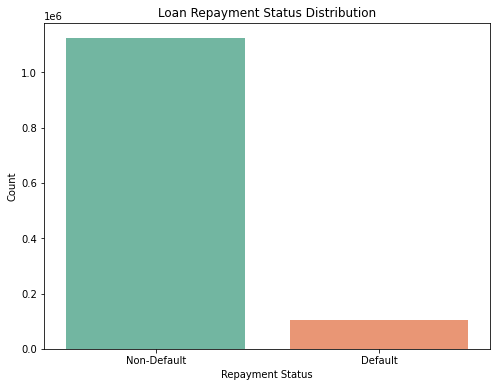

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of TARGET
plt.figure(figsize=(8, 6))
sns.countplot(x='TARGET', data=cleaned_data, palette='Set2')
plt.title('Loan Repayment Status Distribution')
plt.xticks(ticks=[0, 1], labels=['Non-Default', 'Default'])
plt.xlabel('Repayment Status')
plt.ylabel('Count')
plt.show()


# Distribution of CODE_GENDER (Gender Count)

<ipython-input-30-ee5eb736cc77>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CODE_GENDER', data=cleaned_data, palette='muted')


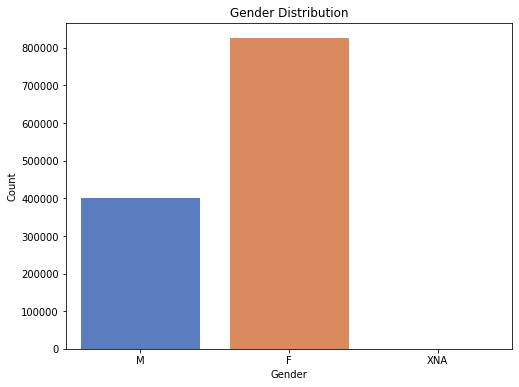

In [30]:
# Distribution of CODE_GENDER
plt.figure(figsize=(8, 6))
sns.countplot(x='CODE_GENDER', data=cleaned_data, palette='muted')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


# Distribution of NAME_CONTRACT_TYPE (Contract Type: Cash or Revolving)

<ipython-input-31-0027fa13b210>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NAME_CONTRACT_TYPE_x', data=cleaned_data, palette='cool')


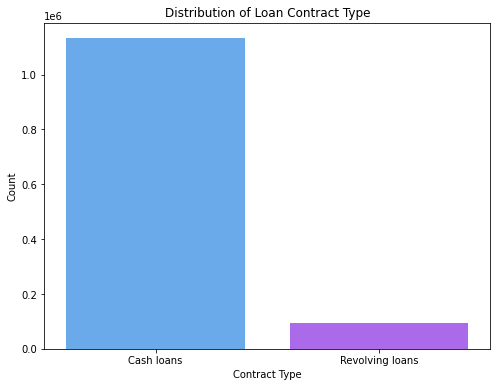

In [31]:
# Distribution of NAME_CONTRACT_TYPE
plt.figure(figsize=(8, 6))
sns.countplot(x='NAME_CONTRACT_TYPE_x', data=cleaned_data, palette='cool')
plt.title('Distribution of Loan Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


# Distribution of FLAG_OWN_CAR (Car Ownership)

<ipython-input-32-acc40e7e1cd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FLAG_OWN_CAR', data=cleaned_data, palette='pastel')


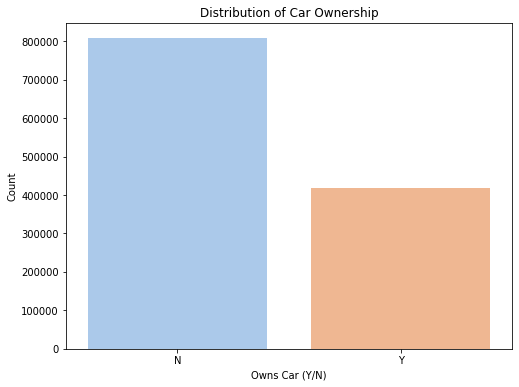

In [32]:
# Distribution of FLAG_OWN_CAR
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG_OWN_CAR', data=cleaned_data, palette='pastel')
plt.title('Distribution of Car Ownership')
plt.xlabel('Owns Car (Y/N)')
plt.ylabel('Count')
plt.show()


# Distribution of FLAG_OWN_REALTY (House Ownership)

<ipython-input-33-71bd252a26f0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FLAG_OWN_REALTY', data=cleaned_data, palette='crest')


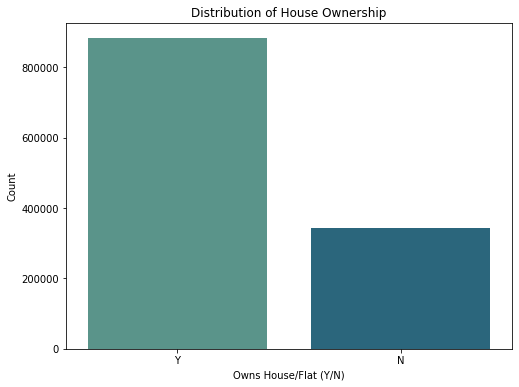

In [33]:
# Distribution of FLAG_OWN_REALTY
plt.figure(figsize=(8, 6))
sns.countplot(x='FLAG_OWN_REALTY', data=cleaned_data, palette='crest')
plt.title('Distribution of House Ownership')
plt.xlabel('Owns House/Flat (Y/N)')
plt.ylabel('Count')
plt.show()


# Distribution of Loan Amount (AMT_INCOME_TOTAL, AMT_CREDIT_x, AMT_ANNUITY_x, AMT_GOODS_PRICE_x)

<ipython-input-34-5fd2f6309f74>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AMT_INCOME_TOTAL', data=cleaned_data, palette='Blues')


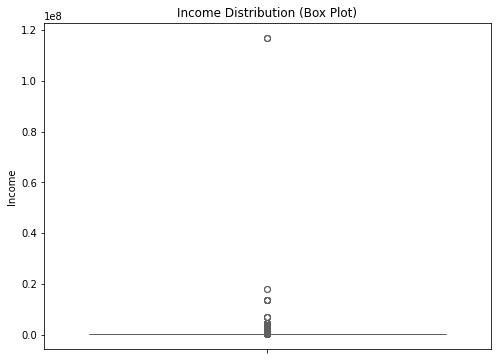

<ipython-input-34-5fd2f6309f74>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AMT_CREDIT_x', data=cleaned_data, palette='Greens')


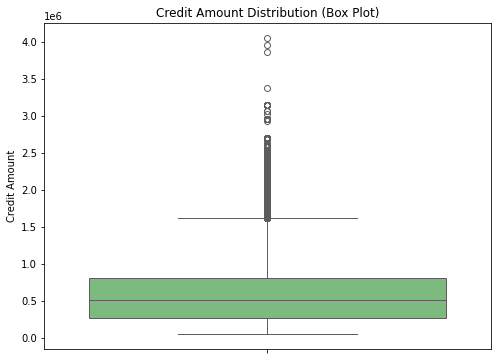

<ipython-input-34-5fd2f6309f74>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AMT_ANNUITY_x', data=cleaned_data, palette='Oranges')


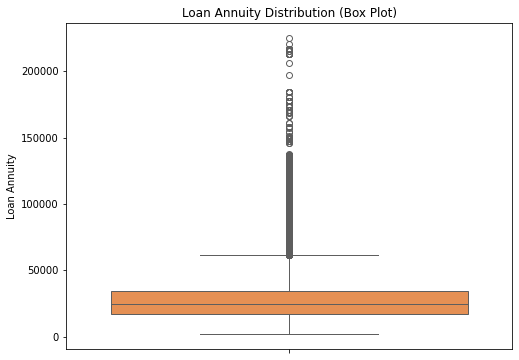

<ipython-input-34-5fd2f6309f74>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='AMT_GOODS_PRICE_x', data=cleaned_data, palette='Purples')


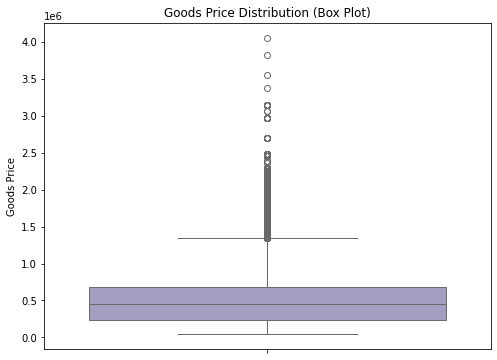

In [34]:
# Income Distribution (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y='AMT_INCOME_TOTAL', data=cleaned_data, palette='Blues')
plt.title('Income Distribution (Box Plot)')
plt.ylabel('Income')
plt.show()

# Credit Amount Distribution (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y='AMT_CREDIT_x', data=cleaned_data, palette='Greens')
plt.title('Credit Amount Distribution (Box Plot)')
plt.ylabel('Credit Amount')
plt.show()

# Loan Annuity Distribution (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y='AMT_ANNUITY_x', data=cleaned_data, palette='Oranges')
plt.title('Loan Annuity Distribution (Box Plot)')
plt.ylabel('Loan Annuity')
plt.show()

# Goods Price Distribution (Box Plot)
plt.figure(figsize=(8, 6))
sns.boxplot(y='AMT_GOODS_PRICE_x', data=cleaned_data, palette='Purples')
plt.title('Goods Price Distribution (Box Plot)')
plt.ylabel('Goods Price')
plt.show()



# Distribution of NAME_TYPE_SUITE (Accompanying Person)

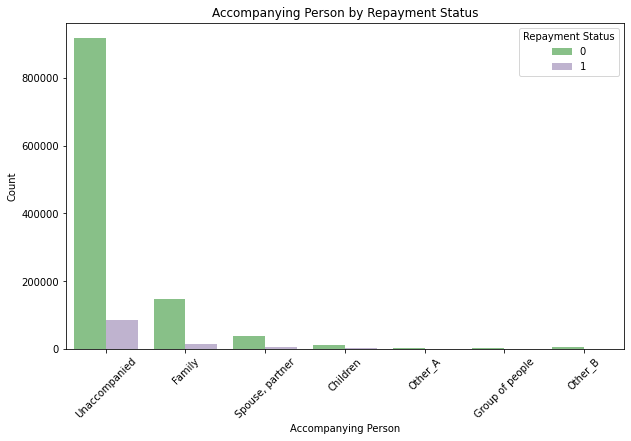

In [35]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_TYPE_SUITE_x', hue='TARGET', palette="Accent")
plt.title('Accompanying Person by Repayment Status')
plt.xlabel('Accompanying Person')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Distribution of NAME_INCOME_TYPE (Client Income Type)

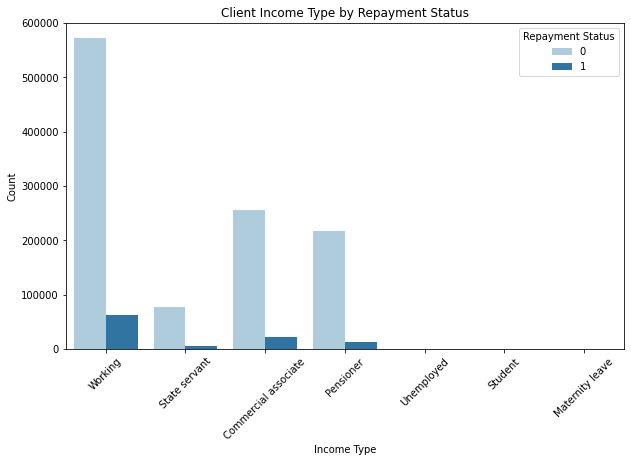

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_INCOME_TYPE', hue='TARGET', palette="Paired")
plt.title('Client Income Type by Repayment Status')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Distribution of Education Level (NAME_EDUCATION_TYPE) by Repayment Status

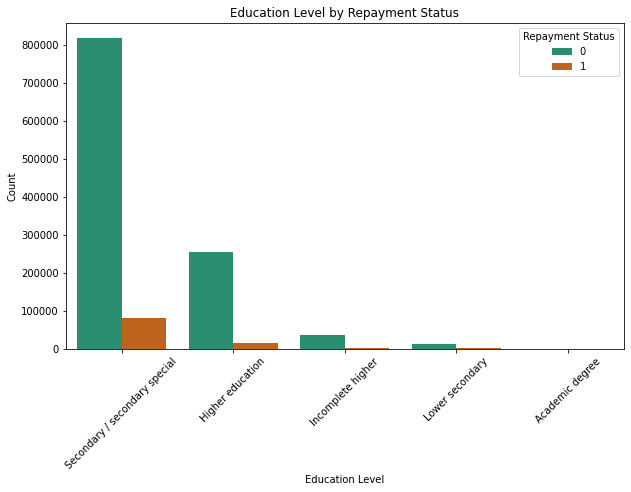

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_EDUCATION_TYPE', hue='TARGET', palette="Dark2")
plt.title('Education Level by Repayment Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Average Earnings by Different Professions (OCCUPATION_TYPE) and Education Types

<ipython-input-38-a1a1a848cd4c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleaned_data, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', palette="Spectral")


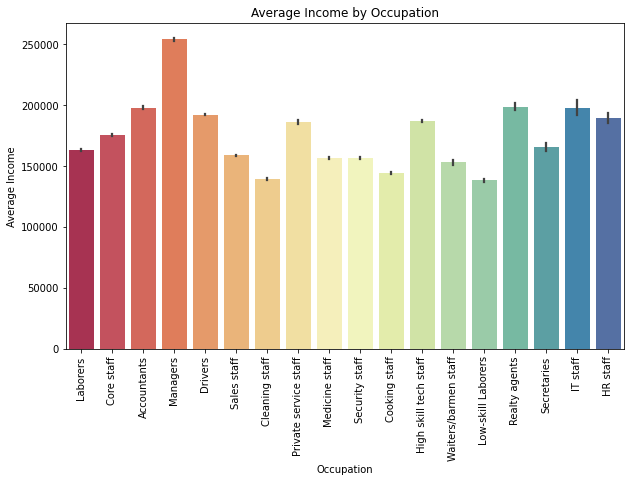

<ipython-input-38-a1a1a848cd4c>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cleaned_data, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', palette="coolwarm")


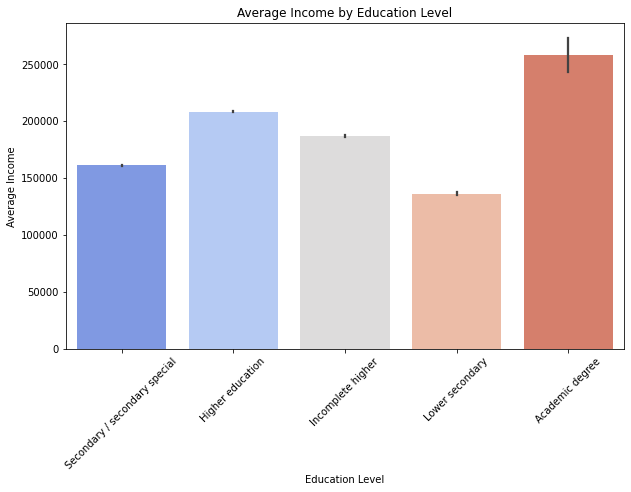

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', palette="Spectral")
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=cleaned_data, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', palette="coolwarm")
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()



# Distribution of Population Density (REGION_POPULATION_RELATIVE) by Repayment Status

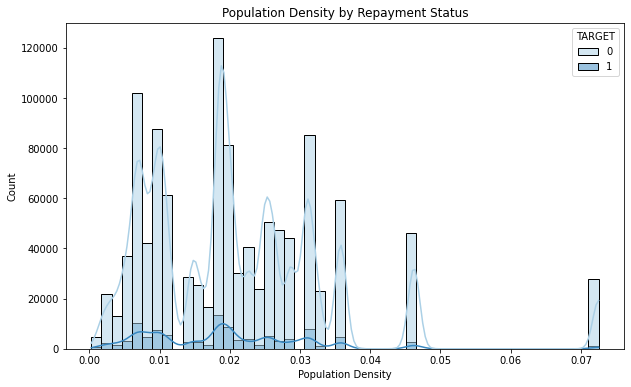

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='REGION_POPULATION_RELATIVE', hue='TARGET', kde=True, palette="Blues", bins=50)
plt.title('Population Density by Repayment Status')
plt.xlabel('Population Density')
plt.ylabel('Count')
plt.show()


# Distribution of Amount Data: Income, Credit Amount, Loan Annuity, Goods Price

<ipython-input-40-eaabc457c253>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_INCOME_TOTAL', palette='Set2')


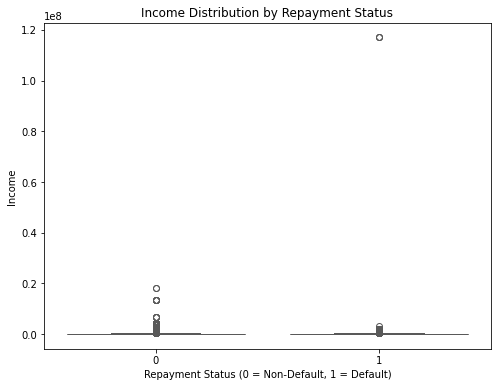

<ipython-input-40-eaabc457c253>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_CREDIT_x', palette='Set3')


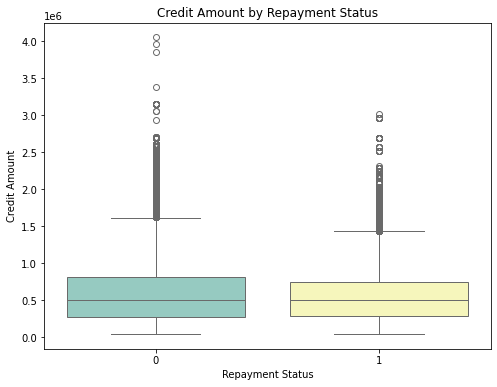

<ipython-input-40-eaabc457c253>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_ANNUITY_x', palette='husl')


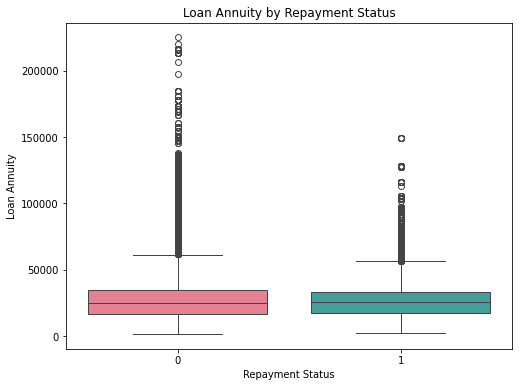

<ipython-input-40-eaabc457c253>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_GOODS_PRICE_x', palette='coolwarm')


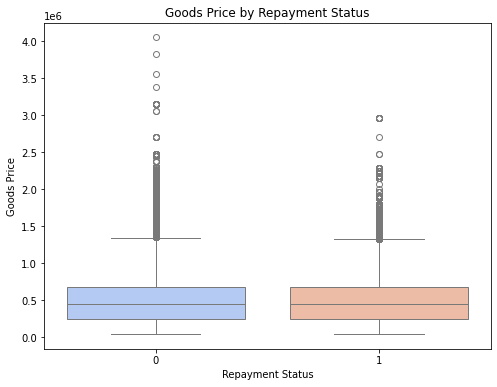

In [40]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_INCOME_TOTAL', palette='Set2')
plt.title('Income Distribution by Repayment Status')
plt.xlabel('Repayment Status (0 = Non-Default, 1 = Default)')
plt.ylabel('Income')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_CREDIT_x', palette='Set3')
plt.title('Credit Amount by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Credit Amount')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_ANNUITY_x', palette='husl')
plt.title('Loan Annuity by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Loan Annuity')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=cleaned_data, x='TARGET', y='AMT_GOODS_PRICE_x', palette='coolwarm')
plt.title('Goods Price by Repayment Status')
plt.xlabel('Repayment Status')
plt.ylabel('Goods Price')
plt.show()


# Average Income, Credit, Annuity, and Goods Price by Gender

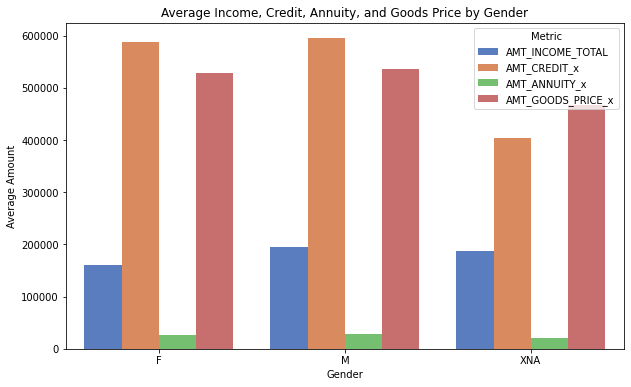

In [41]:
income_by_gender = cleaned_data.groupby('CODE_GENDER')[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x']].mean().reset_index()
income_by_gender = income_by_gender.melt(id_vars="CODE_GENDER", var_name="Metric", value_name="Average Amount")

plt.figure(figsize=(10, 6))
sns.barplot(data=income_by_gender, x='CODE_GENDER', y='Average Amount', hue='Metric', palette='muted')
plt.title('Average Income, Credit, Annuity, and Goods Price by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount')
plt.legend(title='Metric')
plt.show()


# Distribution of Suite Type (NAME_TYPE_SUITE_x)

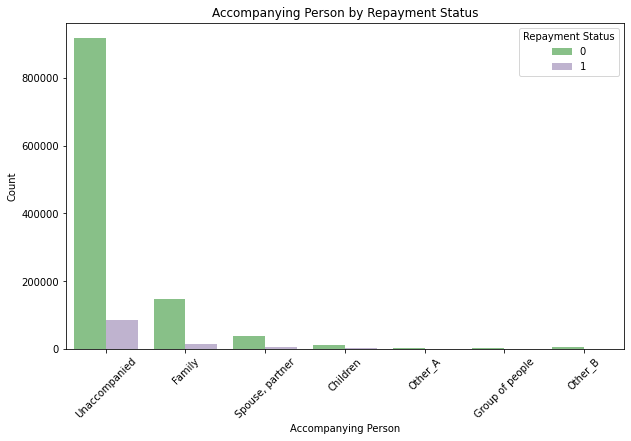

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_TYPE_SUITE_x', hue='TARGET', palette='Accent')
plt.title('Accompanying Person by Repayment Status')
plt.xlabel('Accompanying Person')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Distribution of Client Income Type (NAME_INCOME_TYPE)

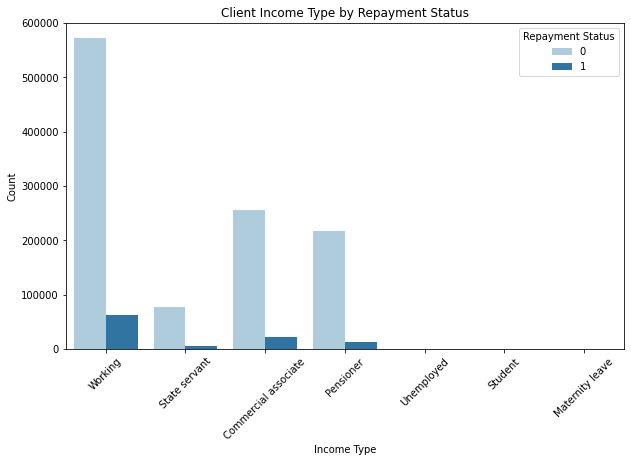

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_INCOME_TYPE', hue='TARGET', palette='Paired')
plt.title('Client Income Type by Repayment Status')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Distribution of Education Level (NAME_EDUCATION_TYPE) by Repayment Status

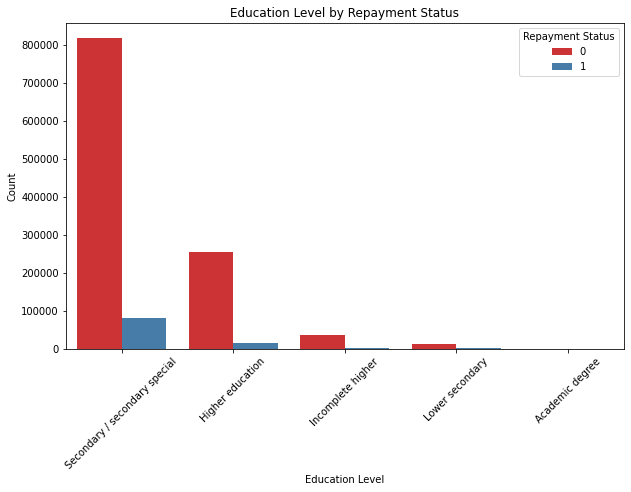

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_data, x='NAME_EDUCATION_TYPE', hue='TARGET', palette='Set1')
plt.title('Education Level by Repayment Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Repayment Status')
plt.xticks(rotation=45)
plt.show()


# Average Earnings by Different Professions (OCCUPATION_TYPE) and Education Types

<ipython-input-45-2cedc6f368f3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_by_occupation, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', palette='Spectral')


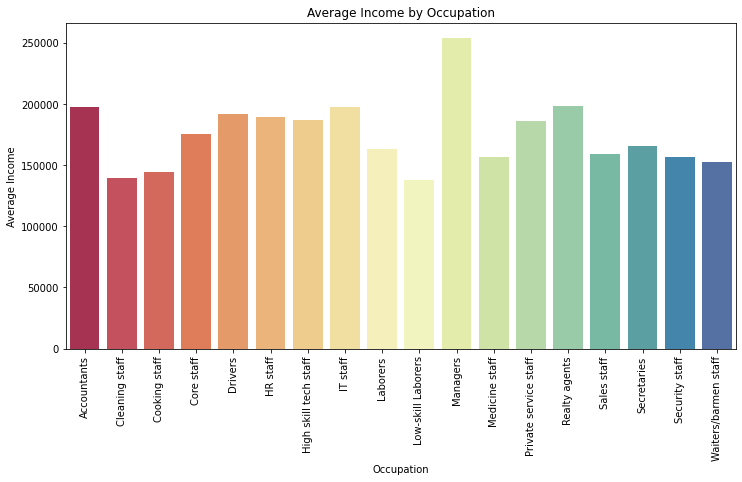

<ipython-input-45-2cedc6f368f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=income_by_education, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', palette='coolwarm')


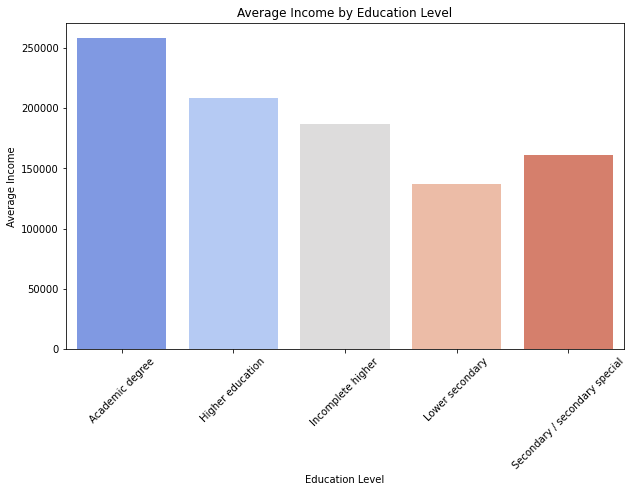

In [45]:
income_by_occupation = cleaned_data.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=income_by_occupation, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', palette='Spectral')
plt.title('Average Income by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.show()

income_by_education = cleaned_data.groupby('NAME_EDUCATION_TYPE')['AMT_INCOME_TOTAL'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=income_by_education, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL', palette='coolwarm')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.show()



# Distribution of Population Density (REGION_POPULATION_RELATIVE) by Repayment Status

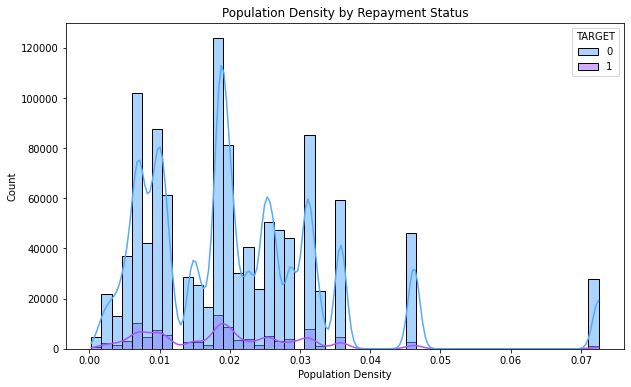

In [46]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_data, x='REGION_POPULATION_RELATIVE', hue='TARGET', kde=True, palette='cool', bins=50)
plt.title('Population Density by Repayment Status')
plt.xlabel('Population Density')
plt.ylabel('Count')
plt.show()


# Correlation Matrix of Selected Features

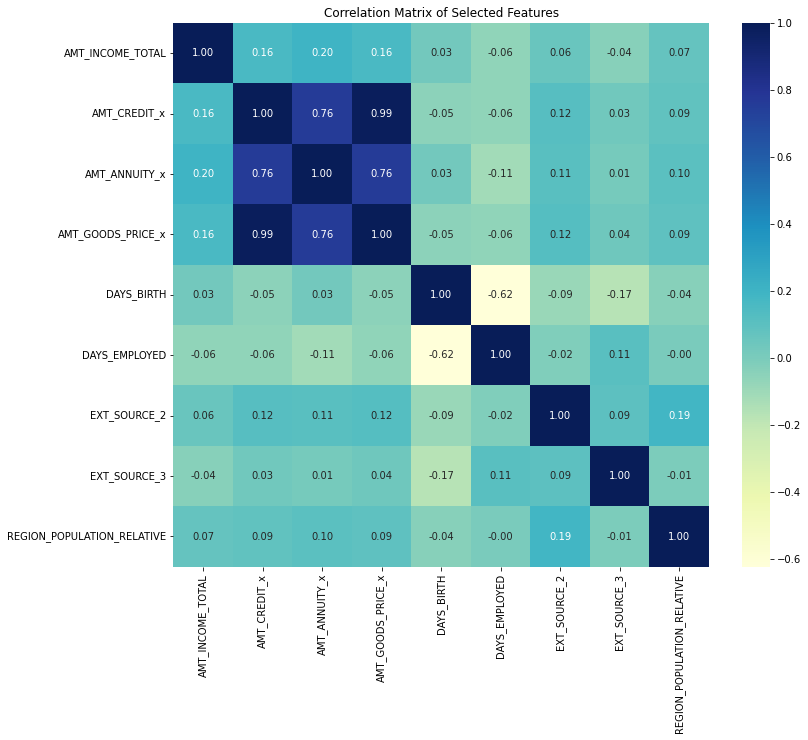

In [47]:
plt.figure(figsize=(12, 10))
correlation_matrix = cleaned_data[['AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x', 
                                   'DAYS_BIRTH', 'DAYS_EMPLOYED', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 
                                   'REGION_POPULATION_RELATIVE']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title('Correlation Matrix of Selected Features')
plt.show()


In [48]:
eda = cleaned_data.copy()
df_repayer = eda[eda['TARGET'] == 0]
df_defaulter = eda[eda['TARGET'] == 1]

In [49]:
corrmat = df_repayer.select_dtypes(include=[float, int]).corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool), k=1)

# Apply the mask to the correlation matrix
corrdf = corrmat.where(mask).stack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Remove NaN values and round correlations
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = corrdf['Correlation'].round(2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by absolute correlation values and get the top 10
top_corr = corrdf.sort_values(by='Correlation', ascending=False).head(10)
print(top_corr)

                          Var1                  Var2  Correlation
32                AMT_CREDIT_x     AMT_GOODS_PRICE_x         0.99
7                 CNT_CHILDREN       CNT_FAM_MEMBERS         0.88
45               AMT_ANNUITY_x     AMT_GOODS_PRICE_x         0.77
31                AMT_CREDIT_x         AMT_ANNUITY_x         0.76
81                  DAYS_BIRTH         DAYS_EMPLOYED         0.63
73  REGION_POPULATION_RELATIVE  REGION_RATING_CLIENT         0.52
17            AMT_INCOME_TOTAL         AMT_ANNUITY_x         0.41
5                 CNT_CHILDREN            DAYS_BIRTH         0.37
82                  DAYS_BIRTH       CNT_FAM_MEMBERS         0.33
16            AMT_INCOME_TOTAL          AMT_CREDIT_x         0.33


AMT_INCOME_TOTAL  Income is the key feature to find a non-defaulter

In [50]:
corrmat = df_defaulter.select_dtypes(include=[float, int]).corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool), k=1)

# Apply the mask to the correlation matrix
corrdf = corrmat.where(mask).stack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']

# Remove NaN values and round correlations
corrdf.dropna(subset=['Correlation'], inplace=True)
corrdf['Correlation'] = corrdf['Correlation'].round(2)
corrdf['Correlation'] = abs(corrdf['Correlation'])

# Sort by absolute correlation values and get the top 10
top_corr = corrdf.sort_values(by='Correlation', ascending=False).head(10)
print(top_corr)

                           Var1                       Var2  Correlation
32                 AMT_CREDIT_x          AMT_GOODS_PRICE_x         0.98
7                  CNT_CHILDREN            CNT_FAM_MEMBERS         0.89
45                AMT_ANNUITY_x          AMT_GOODS_PRICE_x         0.75
31                 AMT_CREDIT_x              AMT_ANNUITY_x         0.75
81                   DAYS_BIRTH              DAYS_EMPLOYED         0.58
73   REGION_POPULATION_RELATIVE       REGION_RATING_CLIENT         0.42
5                  CNT_CHILDREN                 DAYS_BIRTH         0.29
108        REGION_RATING_CLIENT  HOUR_APPR_PROCESS_START_x         0.29
82                   DAYS_BIRTH            CNT_FAM_MEMBERS         0.24
109        REGION_RATING_CLIENT               EXT_SOURCE_2         0.24


HOUR_APPR_PROCESS_START_x and EXT_SOURCE_2 is the key feature to find a defaulter

EXT_SOURCE_2 - Normalized score from external data source
HOUR_APPR_PROCESS_START_x = Approximately at what day hour did the client apply for the previous application

In [51]:
import pandas as pd
from scipy.stats import chi2_contingency

categorical_vars = [
    'NAME_CONTRACT_TYPE_x', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'NAME_TYPE_SUITE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_x',
    'ORGANIZATION_TYPE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE'
]

results = []

for col in categorical_vars:
    contingency_table = pd.crosstab(data[col], data['TARGET'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({
        'Variable': col,
        'Chi2': chi2,
        'p-value': p_value
    })
chi2_results = pd.DataFrame(results)
chi2_results_sorted = chi2_results.sort_values(by=['Chi2', 'p-value'], ascending=[False, True])
print(chi2_results_sorted)

                        Variable         Chi2        p-value
10             ORGANIZATION_TYPE  7479.432253   0.000000e+00
5               NAME_INCOME_TYPE  6285.832132   0.000000e+00
8                OCCUPATION_TYPE  5794.503209   0.000000e+00
11          NAME_CONTRACT_STATUS  4832.736865   0.000000e+00
1                    CODE_GENDER  3956.297244   0.000000e+00
6            NAME_EDUCATION_TYPE  3552.985891   0.000000e+00
7             NAME_FAMILY_STATUS  1880.888416   0.000000e+00
0           NAME_CONTRACT_TYPE_x  1478.289004   0.000000e+00
12             NAME_PAYMENT_TYPE   981.895734  1.522176e-212
2                   FLAG_OWN_CAR   297.566506   1.116747e-66
9   WEEKDAY_APPR_PROCESS_START_x   238.345316   1.266437e-48
4              NAME_TYPE_SUITE_x   103.802837   4.032369e-20
3                FLAG_OWN_REALTY    77.576672   1.276691e-18


A higher Chi2 value suggests a stronger association between the categorical variable and the target variable.

    A low p-value - less then sig value 0.05 association between the variable and the target is statistically significant.

    High Chi2 values and low p-values indicate that the variable is strongly associated with the target variable.

Variables with very low p-values - CODE_GENDER, NAME_INCOME_TYPE, and ORGANIZATION_TYPE
    very strong and statistically significant association with the target variable.

In [52]:
Filtered_features = [
    'AMT_CREDIT_x', 'AMT_GOODS_PRICE_x', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS',
    'AMT_ANNUITY_x', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_POPULATION_RELATIVE',
    'REGION_RATING_CLIENT', 'AMT_INCOME_TOTAL', 'EXT_SOURCE_2','EXT_SOURCE_3', 'HOUR_APPR_PROCESS_START_x',
    'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'NAME_CONTRACT_STATUS',
    'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_CONTRACT_TYPE_x',
    'TARGET'
]

In [53]:
data1 = eda[Filtered_features]

data1
# Save the DataFrame to a CSV file
data1.to_csv('cleaned_data.csv', index=False)

In [54]:
data1.head(5)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET
0,406597.5,351000.0,0,1.0,24700.5,-9461,-637,0.018801,2,202500.0,0.262949,0.139376,10,Business Entity Type 3,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Cash loans,1
1,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
2,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
3,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,School,State servant,Core staff,Approved,F,Higher education,Married,Cash loans,0
4,135000.0,135000.0,0,1.0,6750.0,-19046,-225,0.010032,2,67500.0,0.555912,0.729567,9,Government,Working,Laborers,Approved,M,Secondary / secondary special,Single / not married,Revolving loans,0


In [55]:
['AMT_CREDIT_x','AMT_GOODS_PRICE_x','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_ANNUITY_x','DAYS_EMPLOYED','REGION_POPULATION_RELATIVE','EXT_SOURCE_3','HOUR_APPR_PROCESS_START_x']

['AMT_CREDIT_x',
 'AMT_GOODS_PRICE_x',
 'CNT_CHILDREN',
 'CNT_FAM_MEMBERS',
 'AMT_ANNUITY_x',
 'DAYS_EMPLOYED',
 'REGION_POPULATION_RELATIVE',
 'EXT_SOURCE_3',
 'HOUR_APPR_PROCESS_START_x']

In [56]:
categorical_vars=['ORGANIZATION_TYPE','NAME_INCOME_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_CONTRACT_TYPE_x']

In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_vars:
    data1[col] = le.fit_transform(data1[col].astype(str))

corrmat = data1[categorical_vars + ['TARGET']].corr()

target_corr = corrmat['TARGET'].drop('TARGET').abs().sort_values(ascending=False)
target_corr = target_corr.reset_index()
target_corr.columns = ['Variable', 'Correlation']


target_corr = target_corr.sort_values(by='Correlation', ascending=False).head(15)
print(target_corr)

<ipython-input-57-edd06dd656a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = le.fit_transform(data1[col].astype(str))
<ipython-input-57-edd06dd656a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[col] = le.fit_transform(data1[col].astype(str))
<ipython-input-57-edd06dd656a2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

               Variable  Correlation
0           CODE_GENDER     0.052571
1  NAME_CONTRACT_STATUS     0.048998
2   NAME_EDUCATION_TYPE     0.047889
3      NAME_INCOME_TYPE     0.045311
4  NAME_CONTRACT_TYPE_x     0.031827
5     ORGANIZATION_TYPE     0.031479
6       OCCUPATION_TYPE     0.015053
7    NAME_FAMILY_STATUS     0.006974


In [58]:
data1.head(5)

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET
0,406597.5,351000.0,0,1.0,24700.5,-9461,-637,0.018801,2,202500.0,0.262949,0.139376,10,5,6,8,0,1,4,3,0,1
1,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,39,3,3,0,0,1,1,0,0
2,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,39,3,3,0,0,1,1,0,0
3,1293502.5,1129500.0,0,2.0,35698.5,-16765,-1188,0.003541,1,270000.0,0.622246,0.510090,11,39,3,3,0,0,1,1,0,0
4,135000.0,135000.0,0,1.0,6750.0,-19046,-225,0.010032,2,67500.0,0.555912,0.729567,9,11,6,8,0,1,4,3,1,0


In [59]:
correlation_matrix = data1.corr()

In [60]:
correlation_matrix

,AMT_CREDIT_x,AMT_GOODS_PRICE_x,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY_x,DAYS_BIRTH,DAYS_EMPLOYED,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,AMT_INCOME_TOTAL,EXT_SOURCE_2,EXT_SOURCE_3,HOUR_APPR_PROCESS_START_x,ORGANIZATION_TYPE,NAME_INCOME_TYPE,OCCUPATION_TYPE,NAME_CONTRACT_STATUS,CODE_GENDER,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_CONTRACT_TYPE_x,TARGET
AMT_CREDIT_x,1.000000,0.986152,0.003410,0.064073,0.760036,-0.048223,-0.062513,0.085073,-0.085632,0.158314,0.115965,0.034677,0.046886,-0.046549,-0.057588,-0.021149,-0.030075,0.008301,-0.096756,-0.102142,-0.207356,-0.022770
AMT_GOODS_PRICE_x,0.986152,1.000000,-0.000402,0.062321,0.763636,-0.046389,-0.060338,0.087819,-0.087056,0.159722,0.123440,0.038218,0.056487,-0.045502,-0.056775,-0.022756,-0.030521,0.009570,-0.107114,-0.103369,-0.174262,-0.031634
CNT_CHILDREN,0.003410,-0.000402,1.000000,0.881117,0.028421,0.359990,-0.246313,-0.021921,0.025049,0.011501,-0.021903,-0.042055,-0.000884,-0.153856,0.106209,-0.014655,-0.006067,0.068979,-0.041171,-0.160535,0.028641,0.018976
CNT_FAM_MEMBERS,0.064073,0.062321,0.881117,1.000000,0.083537,0.322628,-0.247163,-0.020730,0.029058,0.014143,-0.008519,-0.034696,-0.004744,-0.152098,0.104389,-0.016868,-0.011861,0.098806,-0.028115,-0.557841,0.013744,0.013144
AMT_ANNUITY_x,0.760036,0.763636,0.028421,0.083537,1.000000,0.028633,-0.109861,0.102364,-0.111810,0.196224,0.108054,0.013602,0.050043,-0.078019,-0.060930,-0.017600,-0.004396,0.072113,-0.122731,-0.103377,-0.236107,-0.007414
DAYS_BIRTH,-0.048223,-0.046389,0.359990,0.322628,0.028633,1.000000,-0.622895,-0.038934,0.018595,0.025530,-0.088917,-0.170490,0.088194,-0.401649,0.209261,0.008321,0.027929,0.186894,-0.144431,-0.129182,0.057407,0.074255
DAYS_EMPLOYED,-0.062513,-0.060338,-0.246313,-0.247163,-0.109861,-0.622895,1.000000,-0.000127,0.028675,-0.064949,-0.018493,0.106686,-0.089309,0.636014,-0.319680,0.008325,-0.020654,-0.175359,0.111853,0.157024,-0.037254,-0.045887
REGION_POPULATION_RELATIVE,0.085073,0.087819,-0.021921,-0.020730,0.102364,-0.038934,-0.000127,1.000000,-0.511991,0.071840,0.187238,-0.007057,0.159090,-0.046531,-0.125789,-0.017132,0.006693,0.012434,-0.049404,0.004115,0.003990,-0.034408
REGION_RATING_CLIENT,-0.085632,-0.087056,0.025049,0.029058,-0.111810,0.018595,0.028675,-0.511991,1.000000,-0.086692,-0.281883,-0.008340,-0.282442,0.058942,0.117636,0.014725,-0.007185,-0.017255,0.049959,-0.011688,0.001376,0.055774
AMT_INCOME_TOTAL,0.158314,0.159722,0.011501,0.014143,0.196224,0.025530,-0.064949,0.071840,-0.086692,1.000000,0.061261,-0.037443,0.037953,-0.056713,-0.044057,-0.010652,0.014809,0.079050,-0.093563,-0.015913,-0.019716,-0.001386


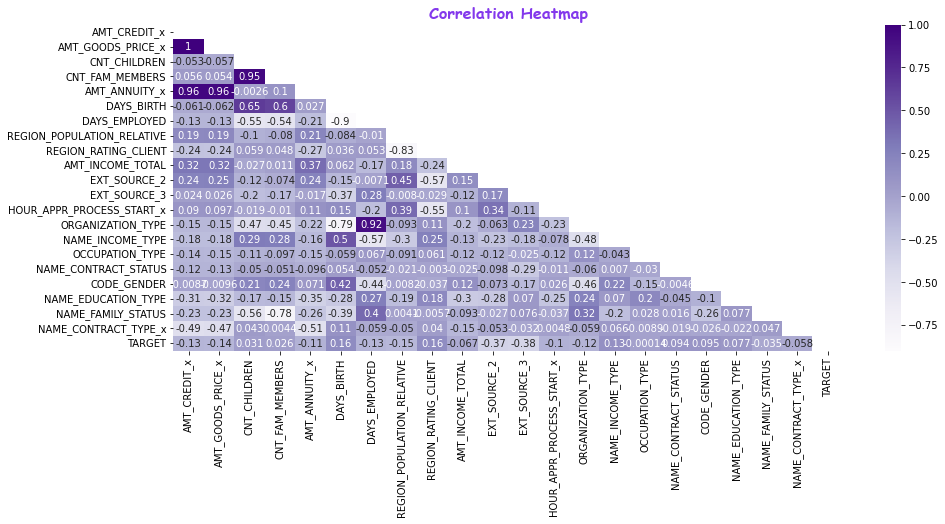

In [61]:
corr_matrix = correlation_matrix.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(15, 6))

sns.heatmap(corr_matrix, cmap="Purples", annot=True, mask=mask, ax=ax,vmax=1)

ax.set_title("Correlation Heatmap", fontsize=16, fontweight='bold', fontname='Comic Sans MS', color='#8338ec')
ax.tick_params(axis='both', colors='black')
plt.show()